**EXTREME GRADIENT BOOSTING (XGB)**

In [176]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2 , f_classif
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.feature_selection import RFE
warnings.filterwarnings('ignore')

In [177]:
data=pd.read_csv("/content/diabetes.csv")

In [178]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70591 entries, 0 to 70590
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Diabetes_binary       70591 non-null  int64
 1   HighBP                70591 non-null  int64
 2   HighChol              70591 non-null  int64
 3   CholCheck             70591 non-null  int64
 4   BMI                   70591 non-null  int64
 5   Smoker                70591 non-null  int64
 6   Stroke                70591 non-null  int64
 7   HeartDiseaseorAttack  70591 non-null  int64
 8   PhysActivity          70591 non-null  int64
 9   Fruits                70591 non-null  int64
 10  Veggies               70591 non-null  int64
 11  HvyAlcoholConsump     70591 non-null  int64
 12  AnyHealthcare         70591 non-null  int64
 13  NoDocbcCost           70591 non-null  int64
 14  GenHlth               70591 non-null  int64
 15  MentHlth              70591 non-null  int64
 16  Phys

In [179]:
data.isnull().sum()


Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [180]:
data.duplicated().sum()

1633

In [181]:
data.drop_duplicates(inplace=True)

In [182]:
data.shape

(68958, 22)

In [183]:
data = data.dropna()

In [184]:
from sklearn.ensemble import IsolationForest
model = IsolationForest()
model.fit(data)
data['anomaly']= model.predict(data)

In [185]:
data

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,anomaly
0,0,1,0,1,26,0,0,0,1,0,...,0,3,5,30,0,1,4,6,8,1
1,0,1,1,1,26,1,1,0,0,1,...,0,3,0,0,0,1,12,6,8,-1
2,0,0,0,1,26,0,0,0,1,1,...,0,1,0,10,0,1,13,6,8,1
3,0,1,1,1,28,1,0,0,1,1,...,0,3,0,3,0,1,11,6,8,1
4,0,0,0,1,29,1,0,0,1,1,...,0,2,0,0,0,0,8,5,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70586,1,1,0,1,26,0,0,0,1,1,...,0,3,0,4,0,0,6,5,1,1
70587,1,1,1,1,28,0,0,1,0,1,...,1,4,0,7,1,0,11,6,6,-1
70588,1,0,1,1,27,0,0,0,1,1,...,0,4,15,4,1,1,6,5,4,-1
70589,1,1,1,1,28,1,0,0,0,0,...,0,5,0,30,1,1,7,4,1,-1


In [186]:
data[data['anomaly']==-1]

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,anomaly
1,0,1,1,1,26,1,1,0,0,1,...,0,3,0,0,0,1,12,6,8,-1
5,0,0,0,1,18,0,0,0,1,1,...,0,2,7,0,0,0,1,4,7,-1
6,0,0,1,1,26,1,0,0,1,1,...,0,1,0,0,0,1,13,5,6,-1
13,0,1,0,1,58,0,0,0,0,1,...,0,3,3,3,0,1,10,4,6,-1
14,0,0,1,1,29,1,0,0,1,1,...,0,1,0,0,1,0,10,5,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70585,1,1,0,1,32,1,0,0,0,0,...,0,3,0,0,0,0,10,4,1,-1
70587,1,1,1,1,28,0,0,1,0,1,...,1,4,0,7,1,0,11,6,6,-1
70588,1,0,1,1,27,0,0,0,1,1,...,0,4,15,4,1,1,6,5,4,-1
70589,1,1,1,1,28,1,0,0,0,0,...,0,5,0,30,1,1,7,4,1,-1


In [187]:
data[data['anomaly']==-1].shape

(28617, 23)

In [188]:
data.drop(data[data['anomaly']==-1].index,inplace = True)

In [189]:
data.shape

(40341, 23)

In [190]:
data


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,anomaly
0,0,1,0,1,26,0,0,0,1,0,...,0,3,5,30,0,1,4,6,8,1
2,0,0,0,1,26,0,0,0,1,1,...,0,1,0,10,0,1,13,6,8,1
3,0,1,1,1,28,1,0,0,1,1,...,0,3,0,3,0,1,11,6,8,1
4,0,0,0,1,29,1,0,0,1,1,...,0,2,0,0,0,0,8,5,8,1
7,0,0,0,1,31,1,0,0,0,1,...,0,4,0,0,0,1,6,4,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70577,1,1,0,1,23,1,0,0,1,1,...,0,1,0,0,0,0,6,4,2,1
70578,1,1,1,1,25,0,0,0,1,0,...,0,3,0,30,0,1,10,6,5,1
70580,1,1,1,1,31,0,0,0,1,1,...,0,3,0,0,0,0,12,3,3,1
70583,1,0,0,1,32,0,0,0,1,1,...,0,1,0,0,0,0,10,5,1,1


In [191]:
data.drop(columns=['anomaly'], inplace=True)

In [192]:
data.shape

(40341, 22)

In [193]:
x = data.drop(['Diabetes_binary'],axis=1)
y = data['Diabetes_binary']

In [194]:
data

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,0,1,26,0,0,0,1,0,...,1,0,3,5,30,0,1,4,6,8
2,0,0,0,1,26,0,0,0,1,1,...,1,0,1,0,10,0,1,13,6,8
3,0,1,1,1,28,1,0,0,1,1,...,1,0,3,0,3,0,1,11,6,8
4,0,0,0,1,29,1,0,0,1,1,...,1,0,2,0,0,0,0,8,5,8
7,0,0,0,1,31,1,0,0,0,1,...,1,0,4,0,0,0,1,6,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70577,1,1,0,1,23,1,0,0,1,1,...,1,0,1,0,0,0,0,6,4,2
70578,1,1,1,1,25,0,0,0,1,0,...,1,0,3,0,30,0,1,10,6,5
70580,1,1,1,1,31,0,0,0,1,1,...,1,0,3,0,0,0,0,12,3,3
70583,1,0,0,1,32,0,0,0,1,1,...,1,0,1,0,0,0,0,10,5,1


In [195]:
# Performing frequency analysis
frequency = data['Diabetes_binary'].value_counts()

print("Diabetes Status:")
print(frequency)

Diabetes Status:
0    23019
1    17322
Name: Diabetes_binary, dtype: int64


In [196]:
# Performing frequency analysis
frequency = data2['Diabetes_binary'].value_counts()

print("Diabetes Status:")
print(frequency)

Diabetes Status:
0    16190
1    16190
Name: Diabetes_binary, dtype: int64


In [197]:
data.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [198]:
x = data.drop(['Diabetes_binary'],axis=1)
y = data['Diabetes_binary']

In [199]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)

StandardScaler()

In [200]:
scaled_features = scaler.transform(x)
x = pd.DataFrame(scaled_features,columns=data.columns[1:])
x.head(10)

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.971623,-0.987363,0.122143,-0.481102,-0.850564,-0.055302,-0.253729,0.445956,-1.451791,0.368324,...,0.057078,-0.125344,0.637410,1.098212,5.858759,-0.309141,1.089594,-1.621697,0.966675,0.912823
1,-1.029206,-0.987363,0.122143,-0.481102,-0.850564,-0.055302,-0.253729,0.445956,0.688805,0.368324,...,0.057078,-0.125344,-1.649986,-0.324409,1.703055,-0.309141,1.089594,1.584353,0.966675,0.912823
2,0.971623,1.012798,0.122143,-0.141190,1.175691,-0.055302,-0.253729,0.445956,0.688805,0.368324,...,0.057078,-0.125344,0.637410,-0.324409,0.248558,-0.309141,1.089594,0.871898,0.966675,0.912823
3,-1.029206,-0.987363,0.122143,0.028766,1.175691,-0.055302,-0.253729,0.445956,0.688805,0.368324,...,0.057078,-0.125344,-0.506288,-0.324409,-0.374797,-0.309141,-0.917773,-0.196786,-0.155369,0.912823
4,-1.029206,-0.987363,0.122143,0.368679,1.175691,-0.055302,-0.253729,-2.242374,0.688805,0.368324,...,0.057078,-0.125344,1.781108,-0.324409,-0.374797,-0.309141,1.089594,-0.909241,-1.277413,-1.888007
5,-1.029206,-0.987363,0.122143,0.538635,-0.850564,-0.055302,-0.253729,0.445956,0.688805,0.368324,...,0.057078,-0.125344,0.637410,-0.324409,-0.374797,-0.309141,-0.917773,-1.977925,0.966675,0.912823
6,-1.029206,-0.987363,0.122143,-0.311146,1.175691,-0.055302,-0.253729,-2.242374,0.688805,0.368324,...,0.057078,-0.125344,0.637410,-0.324409,0.871914,-0.309141,1.089594,-0.909241,-1.277413,-1.327841
7,0.971623,1.012798,0.122143,-0.821015,1.175691,-0.055302,3.941218,0.445956,0.688805,0.368324,...,0.057078,-0.125344,0.637410,-0.324409,0.456344,-0.309141,-0.917773,1.228125,-1.277413,-0.207509
8,-1.029206,-0.987363,0.122143,-1.330883,-0.850564,-0.055302,-0.253729,0.445956,0.688805,0.368324,...,0.057078,-0.125344,-1.649986,-0.324409,-0.374797,-0.309141,1.089594,-1.621697,0.966675,0.912823
9,0.971623,1.012798,0.122143,-0.311146,-0.850564,-0.055302,-0.253729,0.445956,0.688805,0.368324,...,0.057078,-0.125344,-0.506288,-0.324409,-0.374797,-0.309141,1.089594,-0.553014,0.966675,0.912823


In [201]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.2, random_state=0, shuffle =True)

In [170]:
#data2['Diabetes_binary'].value_counts()

0    16190
1    16190
Name: Diabetes_binary, dtype: int64

Resampling using SMOOTE

In [202]:
from imblearn.combine import SMOTEENN
sm = SMOTEENN()
x_resampled, y_resampled = sm.fit_resample(x,y)

In [203]:
xre_train,xre_test,yre_train,yre_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

In [204]:
# Filter training set for Diabetes_binary=0 and count samples
num_train_diabetes_0 = sum(y == 0 for y in yre_train)

# Filter training set for Diabetes_binary=1 and count samples
num_train_diabetes_1 = sum(y == 1 for y in yre_train)

# Filter testing set for Diabetes_binary=0 and count samples
num_test_diabetes_0 = sum(y == 0 for y in yre_test)

# Filter testing set for Diabetes_binary=1 and count samples
num_test_diabetes_1 = sum(y == 1 for y in yre_test)

print("Training set:")
print("Number of data points with Diabetes_binary=0:", num_train_diabetes_0)
print("Number of data points with Diabetes_binary=1:", num_train_diabetes_1)

print("Testing set:")
print("Number of data points with Diabetes_binary=0:", num_test_diabetes_0)
print("Number of data points with Diabetes_binary=1:", num_test_diabetes_1)


Training set:
Number of data points with Diabetes_binary=0: 8360
Number of data points with Diabetes_binary=1: 8632
Testing set:
Number of data points with Diabetes_binary=0: 2094
Number of data points with Diabetes_binary=1: 2154


Training accuracy:
1.0
Testing accuracy
0.9595103578154426
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2094
           1       0.96      0.96      0.96      2154

    accuracy                           0.96      4248
   macro avg       0.96      0.96      0.96      4248
weighted avg       0.96      0.96      0.96      4248

Precision: 0.96
Recall: 0.96
F-measure: 0.96


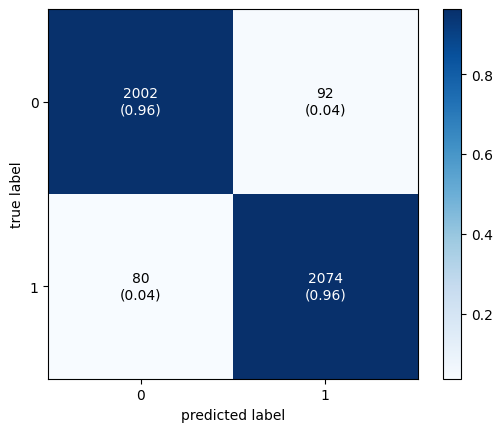

In [205]:
xgb= XGBClassifier(max_depth=20)
xgb.fit(xre_train,yre_train)

y_pred_train_xgb = xgb.predict(xre_train)
acc_train_xgb = accuracy_score(yre_train, y_pred_train_xgb)

y_pred_test_xgb = xgb.predict(xre_test)
acc_test_xgb = accuracy_score(yre_test, y_pred_test_xgb)
print("Training accuracy:")
print(acc_train_xgb)
print("Testing accuracy")
print(acc_test_xgb)

print(classification_report(yre_test, y_pred_test_xgb))

print('Precision: %.2f' % precision_score(yre_test, y_pred_test_xgb,average="micro"))
print('Recall: %.2f' % recall_score(yre_test, y_pred_test_xgb,average="micro"))
print('F-measure: %.2f' % f1_score(yre_test, y_pred_test_xgb,average="micro"))

# calculating and plotting the confusion matrix
cm1 = confusion_matrix(yre_test,y_pred_test_xgb)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,


                                colorbar=True)
plt.show()

LOG

Logistic Regression:
Training Accuracy: 0.9490649606299213
Test Accuracy: 0.9473554735547356


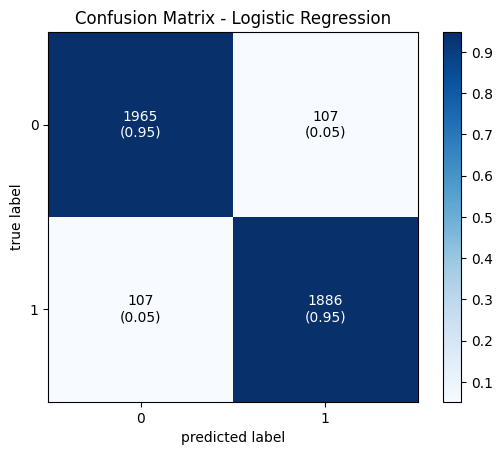


Decision Trees:
Training Accuracy: 0.999753937007874
Test Accuracy: 0.9387453874538746


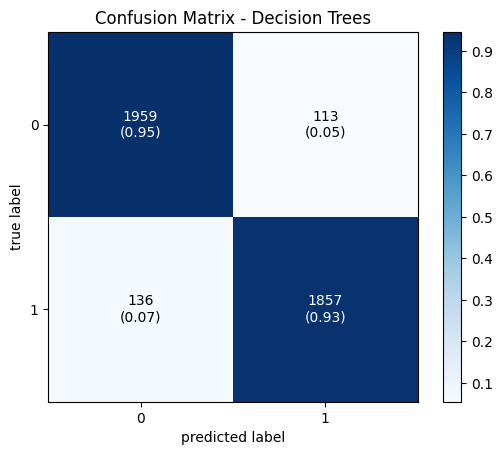


Random Forest:
Training Accuracy: 0.9999384842519685
Test Accuracy: 0.9685116851168512


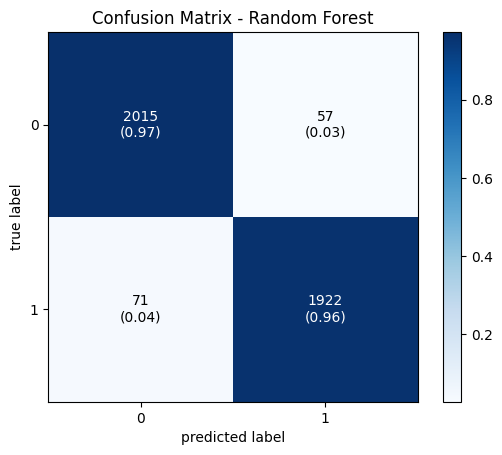


Naive Bayes:
Training Accuracy: 0.8153912401574803
Test Accuracy: 0.8051660516605166


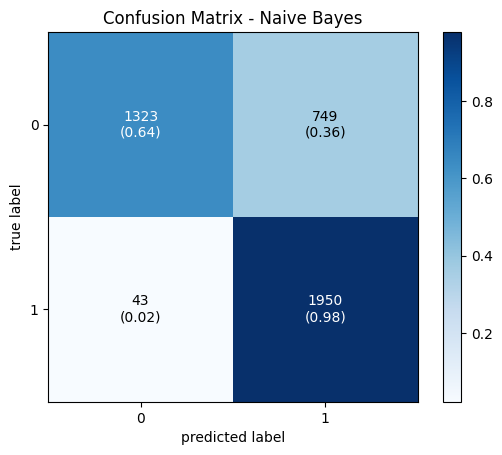


K-Nearest Neighbors:
Training Accuracy: 0.9791461614173228
Test Accuracy: 0.9630996309963099


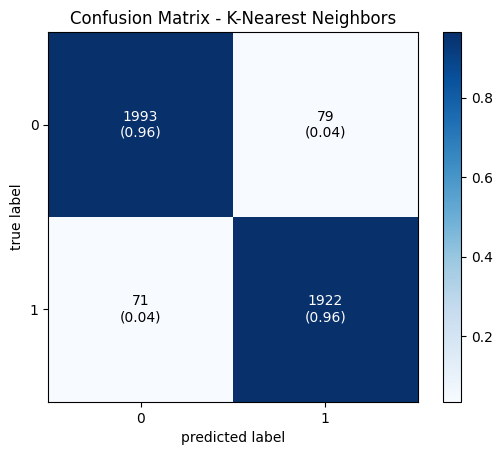

In [ ]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(xre_train, yre_train)

y_pred_train_logreg = log_reg.predict(xre_train)
acc_train_logreg = accuracy_score(yre_train, y_pred_train_logreg)

y_pred_test_logreg = log_reg.predict(xre_test)
acc_test_logreg = accuracy_score(yre_test, y_pred_test_logreg)

print("Logistic Regression:")
print("Training Accuracy:", acc_train_logreg)
print("Test Accuracy:", acc_test_logreg)

# calculating and plotting the confusion matrix
cm_logreg = confusion_matrix(yre_test, y_pred_test_logreg)
plot_confusion_matrix(conf_mat=cm_logreg, show_absolute=True,
                      show_normed=True, colorbar=True)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

print(classification_report(yre_test, y_pred_test_xgb))

print('Precision: %.2f' % precision_score(yre_test, y_pred_test_xgb,average="micro"))
print('Recall: %.2f' % recall_score(yre_test, y_pred_test_xgb,average="micro"))
print('F-measure: %.2f' % f1_score(yre_test, y_pred_test_xgb,average="micro"))

# calculating and plotting the confusion matrix
cm1 = confusion_matrix(yre_test,y_pred_test_xgb)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,


                                colorbar=True)
plt.show()

# Decision Trees
dt = DecisionTreeClassifier(max_depth=20)
dt.fit(xre_train, yre_train)

y_pred_train_dt = dt.predict(xre_train)
acc_train_dt = accuracy_score(yre_train, y_pred_train_dt)

y_pred_test_dt = dt.predict(xre_test)
acc_test_dt = accuracy_score(yre_test, y_pred_test_dt)

print("\nDecision Trees:")
print("Training Accuracy:", acc_train_dt)
print("Test Accuracy:", acc_test_dt)

# calculating and plotting the confusion matrix
cm_dt = confusion_matrix(yre_test, y_pred_test_dt)
plot_confusion_matrix(conf_mat=cm_dt, show_absolute=True,
                      show_normed=True, colorbar=True)
plt.title("Confusion Matrix - Decision Trees")
plt.show()

# Random Forest
rf = RandomForestClassifier(max_depth=20)
rf.fit(xre_train, yre_train)

y_pred_train_rf = rf.predict(xre_train)
acc_train_rf = accuracy_score(yre_train, y_pred_train_rf)

y_pred_test_rf = rf.predict(xre_test)
acc_test_rf = accuracy_score(yre_test, y_pred_test_rf)

print("\nRandom Forest:")
print("Training Accuracy:", acc_train_rf)
print("Test Accuracy:", acc_test_rf)

# calculating and plotting the confusion matrix
cm_rf = confusion_matrix(yre_test, y_pred_test_rf)
plot_confusion_matrix(conf_mat=cm_rf, show_absolute=True,
                      show_normed=True, colorbar=True)
plt.title("Confusion Matrix - Random Forest")
plt.show()



# Naive Bayes
nb = GaussianNB()
nb.fit(xre_train, yre_train)

y_pred_train_nb = nb.predict(xre_train)
acc_train_nb = accuracy_score(yre_train, y_pred_train_nb)

y_pred_test_nb = nb.predict(xre_test)
acc_test_nb = accuracy_score(yre_test, y_pred_test_nb)

print("\nNaive Bayes:")
print("Training Accuracy:", acc_train_nb)
print("Test Accuracy:", acc_test_nb)

# calculating and plotting the confusion matrix
cm_nb = confusion_matrix(yre_test, y_pred_test_nb)
plot_confusion_matrix(conf_mat=cm_nb, show_absolute=True,
                      show_normed=True, colorbar=True)
plt.title("Confusion Matrix - Naive Bayes")
plt.show()

# K-Nearest Neighbors (K-NN)
knn = KNeighborsClassifier()
knn.fit(xre_train, yre_train)

y_pred_train_knn = knn.predict(xre_train)
acc_train_knn = accuracy_score(yre_train, y_pred_train_knn)

y_pred_test_knn = knn.predict(xre_test)
acc_test_knn = accuracy_score(yre_test, y_pred_test_knn)

print("\nK-Nearest Neighbors:")
print("Training Accuracy:", acc_train_knn)
print("Test Accuracy:", acc_test_knn)

# calculating and plotting the confusion matrix
cm_knn = confusion_matrix(yre_test, y_pred_test_knn)
plot_confusion_matrix(conf_mat=cm_knn, show_absolute=True,
                      show_normed=True, colorbar=True)
plt.title("Confusion Matrix - K-Nearest Neighbors")
plt.show()





LOGISTICS REGRESSION

Logistic Regression:
Training Accuracy: 0.9436680951493696
Test Accuracy: 0.9438648782911078
Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      1987
           1       0.94      0.95      0.94      2039

    accuracy                           0.94      4026
   macro avg       0.94      0.94      0.94      4026
weighted avg       0.94      0.94      0.94      4026

Precision: 0.94
Recall: 0.94
F-measure: 0.94


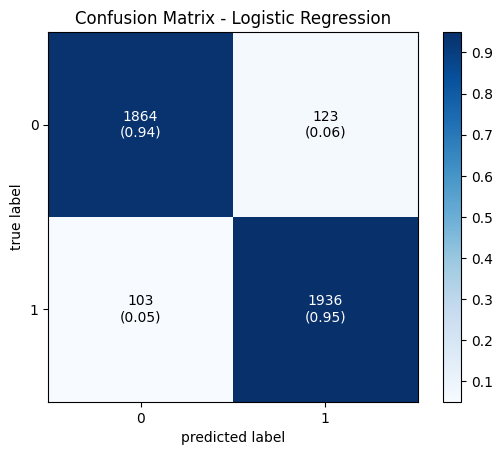

In [ ]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(xre_train, yre_train)

# Predictions on training set
y_pred_train_logreg = log_reg.predict(xre_train)
acc_train_logreg = accuracy_score(yre_train, y_pred_train_logreg)

# Predictions on testing set
y_pred_test_logreg = log_reg.predict(xre_test)
acc_test_logreg = accuracy_score(yre_test, y_pred_test_logreg)

# Print accuracies
print("Logistic Regression:")
print("Training Accuracy:", acc_train_logreg)
print("Test Accuracy:", acc_test_logreg)

# Classification report for Logistic Regression
print("Classification Report - Logistic Regression:")
print(classification_report(yre_test, y_pred_test_logreg))

# Precision, Recall, and F-measure for Logistic Regression
print('Precision: %.2f' % precision_score(yre_test, y_pred_test_logreg, average="micro"))
print('Recall: %.2f' % recall_score(yre_test, y_pred_test_logreg, average="micro"))
print('F-measure: %.2f' % f1_score(yre_test, y_pred_test_logreg, average="micro"))

# Calculating and plotting the confusion matrix for Logistic Regression
cm_logreg = confusion_matrix(yre_test, y_pred_test_logreg)
plot_confusion_matrix(conf_mat=cm_logreg, show_absolute=True, show_normed=True, colorbar=True)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


**RANDOM FOREST**


Random Forest:
Training Accuracy: 1.0
Test Accuracy: 0.9719014626635873
Classification Report - Random Forest:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1356
           1       0.97      0.97      0.97      1242

    accuracy                           0.97      2598
   macro avg       0.97      0.97      0.97      2598
weighted avg       0.97      0.97      0.97      2598



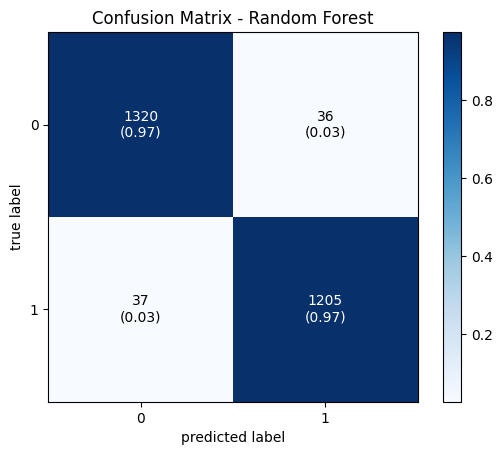

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf = RandomForestClassifier(max_depth=20)
rf.fit(xre_train, yre_train)

# Predictions on training set
y_pred_train_rf = rf.predict(xre_train)
acc_train_rf = accuracy_score(yre_train, y_pred_train_rf)

# Predictions on testing set
y_pred_test_rf = rf.predict(xre_test)
acc_test_rf = accuracy_score(yre_test, y_pred_test_rf)

# Print accuracies
print("\nRandom Forest:")
print("Training Accuracy:", acc_train_rf)
print("Test Accuracy:", acc_test_rf)

# Classification report for Random Forest
print("Classification Report - Random Forest:")
print(classification_report(yre_test, y_pred_test_rf))

# calculating and plotting the confusion matrix
cm_rf = confusion_matrix(yre_test, y_pred_test_rf)
plot_confusion_matrix(conf_mat=cm_rf, show_absolute=True,
                      show_normed=True, colorbar=True)
plt.title("Confusion Matrix - Random Forest")
plt.show()


DECISION TREE


Decision Trees:
Training Accuracy: 1.0
Test Accuracy: 0.949576597382602
Classification Report - Decision Trees:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1356
           1       0.94      0.95      0.95      1242

    accuracy                           0.95      2598
   macro avg       0.95      0.95      0.95      2598
weighted avg       0.95      0.95      0.95      2598



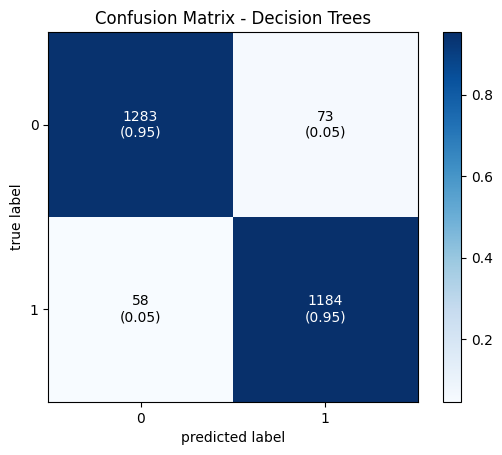

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Decision Trees
dt = DecisionTreeClassifier(max_depth=20)
dt.fit(xre_train, yre_train)

# Predictions on training set
y_pred_train_dt = dt.predict(xre_train)
acc_train_dt = accuracy_score(yre_train, y_pred_train_dt)

# Predictions on testing set
y_pred_test_dt = dt.predict(xre_test)
acc_test_dt = accuracy_score(yre_test, y_pred_test_dt)

# Print accuracies
print("\nDecision Trees:")
print("Training Accuracy:", acc_train_dt)
print("Test Accuracy:", acc_test_dt)

# Classification report for Decision Trees
print("Classification Report - Decision Trees:")
print(classification_report(yre_test, y_pred_test_dt))

# calculating and plotting the confusion matrix
cm_dt = confusion_matrix(yre_test, y_pred_test_dt)
plot_confusion_matrix(conf_mat=cm_dt, show_absolute=True,
                      show_normed=True, colorbar=True)
plt.title("Confusion Matrix - Decision Trees")
plt.show()


NAIVE BAYES


Naive Bayes:
Training Accuracy: 0.9244320369657297
Test Accuracy: 0.9257120862201693
Classification Report - Naive Bayes:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1356
           1       0.91      0.93      0.92      1242

    accuracy                           0.93      2598
   macro avg       0.93      0.93      0.93      2598
weighted avg       0.93      0.93      0.93      2598



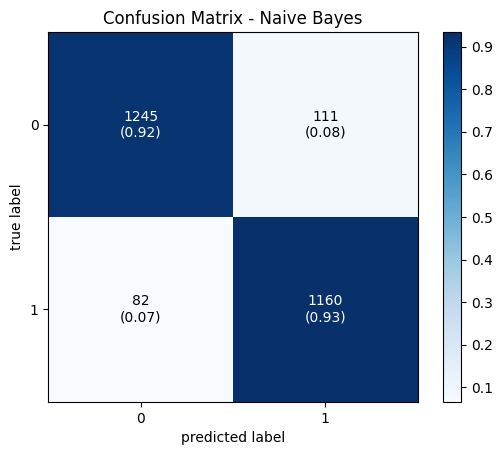

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Naive Bayes
nb = GaussianNB()
nb.fit(xre_train, yre_train)

# Predictions on training set
y_pred_train_nb = nb.predict(xre_train)
acc_train_nb = accuracy_score(yre_train, y_pred_train_nb)

# Predictions on testing set
y_pred_test_nb = nb.predict(xre_test)
acc_test_nb = accuracy_score(yre_test, y_pred_test_nb)

# Print accuracies
print("\nNaive Bayes:")
print("Training Accuracy:", acc_train_nb)
print("Test Accuracy:", acc_test_nb)

# Classification report for Naive Bayes
print("Classification Report - Naive Bayes:")
print(classification_report(yre_test, y_pred_test_nb))

# calculating and plotting the confusion matrix
cm_nb = confusion_matrix(yre_test, y_pred_test_nb)
plot_confusion_matrix(conf_mat=cm_nb, show_absolute=True,
                      show_normed=True, colorbar=True)
plt.title("Confusion Matrix - Naive Bayes")
plt.show()


KNN


K-Nearest Neighbors:
Training Accuracy: 0.9801694262610705
Test Accuracy: 0.972671285604311
Classification Report - K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1356
           1       0.97      0.97      0.97      1242

    accuracy                           0.97      2598
   macro avg       0.97      0.97      0.97      2598
weighted avg       0.97      0.97      0.97      2598



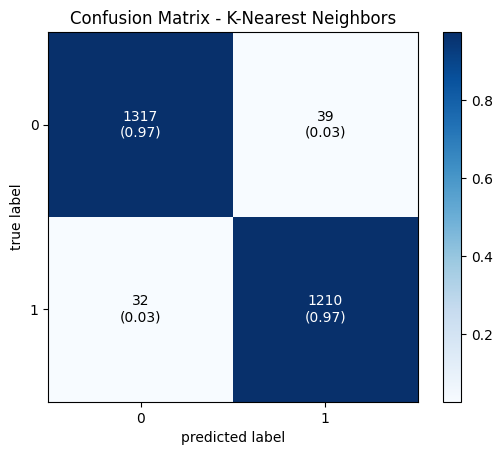

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# K-Nearest Neighbors (K-NN)
knn = KNeighborsClassifier()
knn.fit(xre_train, yre_train)

# Predictions on training set
y_pred_train_knn = knn.predict(xre_train)
acc_train_knn = accuracy_score(yre_train, y_pred_train_knn)

# Predictions on testing set
y_pred_test_knn = knn.predict(xre_test)
acc_test_knn = accuracy_score(yre_test, y_pred_test_knn)

# Print accuracies
print("\nK-Nearest Neighbors:")
print("Training Accuracy:", acc_train_knn)
print("Test Accuracy:", acc_test_knn)

# Classification report for K-Nearest Neighbors
print("Classification Report - K-Nearest Neighbors:")
print(classification_report(yre_test, y_pred_test_knn))

# calculating and plotting the confusion matrix
cm_knn = confusion_matrix(yre_test, y_pred_test_knn)
plot_confusion_matrix(conf_mat=cm_knn, show_absolute=True,
                      show_normed=True, colorbar=True)
plt.title("Confusion Matrix - K-Nearest Neighbors")
plt.show()



Support Vector Machine:
Training Accuracy: 0.9627214566929134
Test Accuracy: 0.9571955719557196


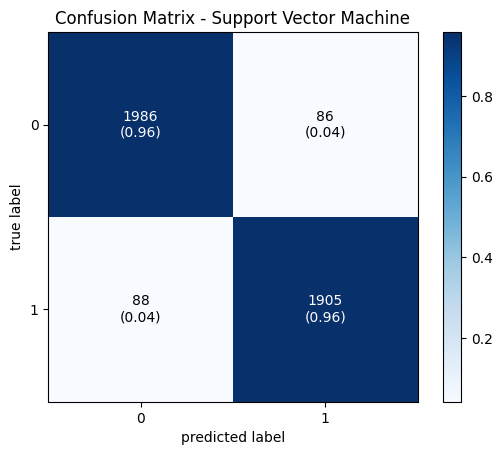

In [ ]:
# Support Vector Machine (SVM)
svm = SVC()
svm.fit(xre_train, yre_train)

y_pred_train_svm = svm.predict(xre_train)
acc_train_svm = accuracy_score(yre_train, y_pred_train_svm)

y_pred_test_svm = svm.predict(xre_test)
acc_test_svm = accuracy_score(yre_test, y_pred_test_svm)

print("\nSupport Vector Machine:")
print("Training Accuracy:", acc_train_svm)
print("Test Accuracy:", acc_test_svm)

# calculating and plotting the confusion matrix
cm_svm = confusion_matrix(yre_test, y_pred_test_svm)
plot_confusion_matrix(conf_mat=cm_svm, show_absolute=True,
                      show_normed=True, colorbar=True)
plt.title("Confusion Matrix - Support Vector Machine")
plt.show()

**NEURAL NETWORK**


Neural Network:
Training Accuracy: 0.9922025413939161
Test Accuracy: 0.9757505773672055
Classification Report - Neural Network:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1356
           1       0.97      0.98      0.97      1242

    accuracy                           0.98      2598
   macro avg       0.98      0.98      0.98      2598
weighted avg       0.98      0.98      0.98      2598



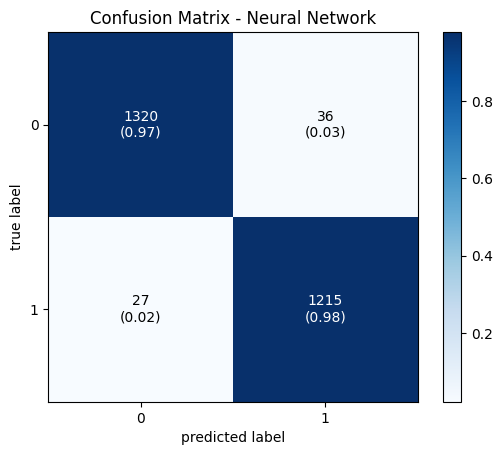

In [ ]:
from sklearn.neural_network import MLPClassifier

# Neural Network
mlp = MLPClassifier()
mlp.fit(xre_train, yre_train)

# Predictions on training set
y_pred_train_mlp = mlp.predict(xre_train)
acc_train_mlp = accuracy_score(yre_train, y_pred_train_mlp)

# Predictions on testing set
y_pred_test_mlp = mlp.predict(xre_test)
acc_test_mlp = accuracy_score(yre_test, y_pred_test_mlp)

# Print accuracies
print("\nNeural Network:")
print("Training Accuracy:", acc_train_mlp)
print("Test Accuracy:", acc_test_mlp)

# Classification report for Neural Network
print("Classification Report - Neural Network:")
print(classification_report(yre_test, y_pred_test_mlp))

# calculating and plotting the confusion matrix
cm_mlp = confusion_matrix(yre_test, y_pred_test_mlp)
plot_confusion_matrix(conf_mat=cm_mlp, show_absolute=True,
                      show_normed=True, colorbar=True)
plt.title("Confusion Matrix - Neural Network")
plt.show()



Ensemble Method:
Training Accuracy: 0.9881594147092799
Test Accuracy: 0.9742109314857583
Classification Report - Ensemble Method:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1356
           1       0.97      0.98      0.97      1242

    accuracy                           0.97      2598
   macro avg       0.97      0.97      0.97      2598
weighted avg       0.97      0.97      0.97      2598



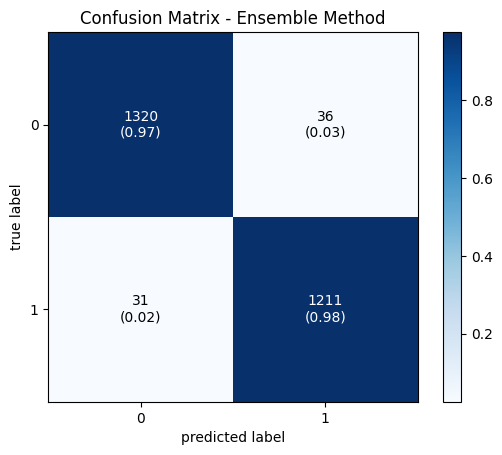

In [ ]:
from sklearn import svm
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

# Assuming you have defined other classifiers (log_reg, dt, rf, nb, knn, mlp) earlier

# Create SVM classifier
svm_classifier = svm.SVC()

# Ensemble Method (Voting Classifier)
ensemble = VotingClassifier(estimators=[
    ('log_reg', log_reg),
    ('dt', dt),
    ('rf', rf),
    ('svm', svm_classifier),
    ('nb', nb),
    ('knn', knn),
    ('mlp', mlp)
], voting='hard')

ensemble.fit(xre_train, yre_train)

# Predictions on training set
y_pred_train_ensemble = ensemble.predict(xre_train)
acc_train_ensemble = accuracy_score(yre_train, y_pred_train_ensemble)

# Predictions on testing set
y_pred_test_ensemble = ensemble.predict(xre_test)
acc_test_ensemble = accuracy_score(yre_test, y_pred_test_ensemble)

# Print accuracies
print("\nEnsemble Method:")
print("Training Accuracy:", acc_train_ensemble)
print("Test Accuracy:", acc_test_ensemble)

# Classification report for Ensemble Method
print("Classification Report - Ensemble Method:")
print(classification_report(yre_test, y_pred_test_ensemble))

# calculating and plotting the confusion matrix
cm_ensemble = confusion_matrix(yre_test, y_pred_test_ensemble)
plot_confusion_matrix(conf_mat=cm_ensemble, show_absolute=True,
                      show_normed=True, colorbar=True)
plt.title("Confusion Matrix - Ensemble Method")
plt.show()
